# Game of Life


The [Game of Life](http://en.wikipedia.org/wiki/Conway's_Game_of_Life) (GoF) is a cellular automaton devised by the British mathematician John Horton Conway in 1970. The game is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves, or, for advanced players, by creating patterns with particular properties.

The universe of the Game of Life is an infinite two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, live or dead. Every cell interacts with its eight neighbours, which are the cells that are directly horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:

* Any live cell with fewer than two live neighbours dies, as if by underpopulation.
* Any live cell with more than three live neighbours dies, as if by overcrowding.
* Any live cell with two or three live neighbours lives, unchanged, to the next generation.
* Any dead cell with exactly three live neighbours becomes a live cell.

The initial pattern (generation 0) constitutes the "seed" of the system.
Time is considered discrete, and each time step (sometimes called a tick), the previous rules are applied simultaneously to every cell in the grid; "births" and "deaths" are immediate.
Each generation is a pure function of the previous generation alone.


## Assignments

* Begin by implementing the GoF's rules and create few examples with basic seeds in small dimensions. Hint: create `.gif` animations from sequences of still `.png` images
* Implement examples of the three categories of patterns *still lifes*, *oscillators* and *spaceships* (check the [wiki link](http://en.wikipedia.org/wiki/Conway's_Game_of_Life))
* Analyse the evolutions of these patterns in terms of frequency (the number of cycles required to return to the original configuration, if any), occupancy (how many alive cells there are at every step of the game), replication or heat (the average number of cells that change state at each generation), speed (if applicable), etc.
* Increase the size of the GoF's world and play with more advanced and complex patterns

# Game of Life

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import os
import glob
from PIL import Image

# Game of Life

In [34]:
def checkPoint(grid, x, y):
    liveCount = 0
    for j in range(-1, 2):
        for i in range(-1, 2):
            xInGrid = 0 <= i + x < grid.shape[1]
            yInGrid = 0 <= j + y < grid.shape[0]
            if not (i == j == 0):
                if xInGrid and yInGrid:
                    xToCheck = i + x
                    yToCheck = j + y
                else:
                    if xInGrid:
                        xToCheck = i + x
                    else:
                        xToCheck = grid.shape[1] + i
                        if xToCheck > grid.shape[1]:
                            xToCheck = 0
                    if yInGrid:
                        yToCheck = j + y
                    else:
                        yToCheck = grid.shape[0] + j
                        if yToCheck > grid.shape[0]:
                            yToCheck = 0
                liveCount += grid[yToCheck][xToCheck]

    if grid[y][x]:
        if liveCount == 2 or liveCount == 3:
            return True
    if not grid[y][x]:
        if liveCount == 3:
            return True
    return False

In [35]:
def updateGrid(grid):
    nextGrid = np.full(mainGrid.shape, False)
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            nextGrid[i][j] = checkPoint(grid, j, i)
    return nextGrid

In [70]:
def drawGrid(grid):
    figureY = (grid.shape[1] * 6) / grid.shape[0]
    figure, ax = plt.subplots(figsize=(figureY, 6))
    cmap = colors.ListedColormap(['Black','White'])
    return ax.pcolor(grid[::-1],cmap=cmap), figure

In [71]:
def drawFirstGrid(grid, path):
    plt.ion()
    grd, figure = drawGrid(grid)
    figure.savefig(path + '/pics/fig0.png')
    figure.suptitle('Generation number 1')
    return figure, grd

In [38]:
def drawNextGrid(figure, grd, f, grid, lastGrid, path):
    grd.set_array(grid[::-1].ravel())
    figure.canvas.flush_events()
    if np.allclose(grid, lastGrid):
        figure.suptitle('Generation stopped at frame ' + str(f) + " because the grid is not changing anymore.")
        figure.savefig(path + '/pics/fig-last.png')
        return True
    else:
        figure.suptitle('Generation number ' + str(f))
    if f < 10:
        figure.savefig(path + '/pics/fig0' + str(f) + '.png')
    else:
        figure.savefig(path + '/pics/fig' + str(f) + '.png')
    
    return False


In [72]:
def createGridFromFile(path, gridHeight, gridWidth):
    file = open(path, 'r')
    lines = file.readlines()
    grid = np.zeros((gridHeight, gridWidth))
    i = 0
    for line in lines:
        j = 0
        for x in line.strip():
            grid[i][j] = x
            j += 1
        i += 1
    return grid.astype(np.bool)

In [40]:
def cleanFolder(path):
    for file_name in os.listdir(path):
        file = path + "/" + file_name
        if os.path.isfile(file):
            os.remove(file)

In [41]:
def make_gif(path, output, framesTime, framesToRun):
    frames = [Image.open(image) for image in glob.glob(f"{path}/pics/*.png")]
    frame_one = frames[0]
    frame_one.save(output, format="GIF", append_images=frames,
               save_all=True, duration=framesTime*framesToRun, loop=0)

In [60]:
def runGameOfLife(grid, path, framesToRun, framesTime):
    cleanFolder(path + '/pics')
    nextGrid = grid.copy()
    figure, grd = drawFirstGrid(nextGrid, path)
    lastGrid = nextGrid
    for f in range(1, framesToRun):
        nextGrid = updateGrid(nextGrid)
        isPlayStopped = drawNextGrid(figure, grd, f, nextGrid, lastGrid, path)
        if isPlayStopped:
            break
        lastGrid = nextGrid
    finalOutput = path + "/finalAnimation.gif"
    make_gif(path, finalOutput, framesTime, framesToRun)

In [57]:
def validatePath(path):
    picsPath = path + '/pics'
    if not(os.path.exists(picsPath)):
        os.makedirs(picsPath)

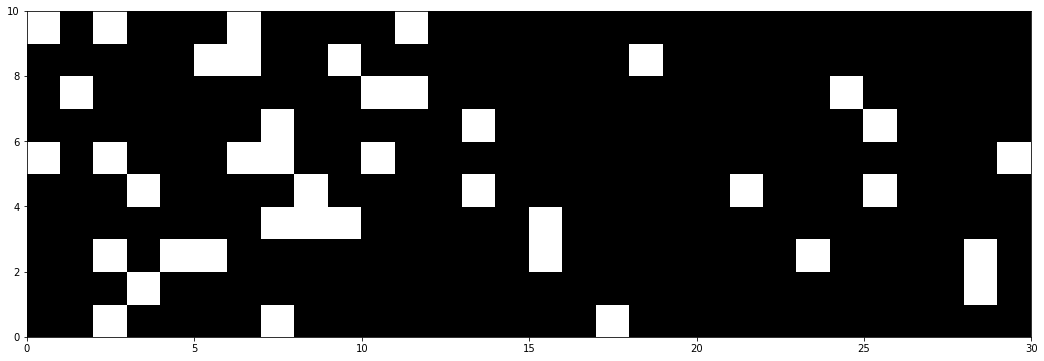

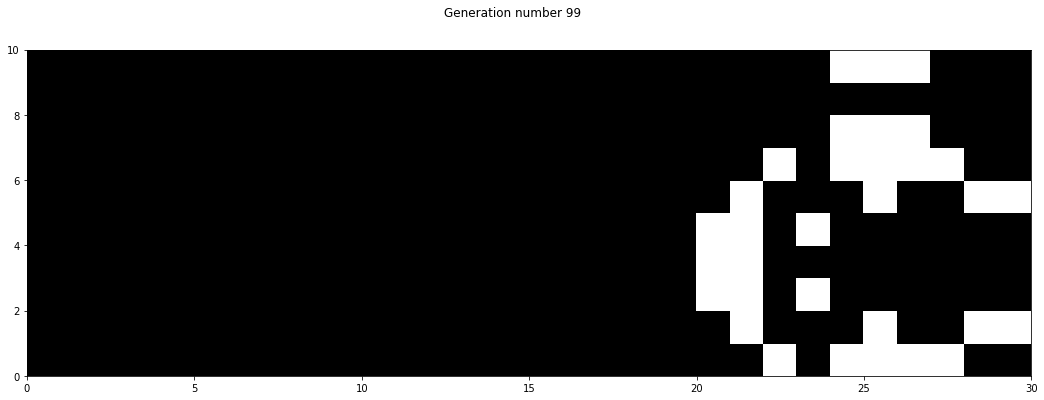

In [73]:
gridWidth = 30
gridHeight = 10
framesToRun = 100
frameTime = 1
path = 'samples/random-sample'
validatePath(path)
mainGrid = np.random.choice([False, True], (gridHeight, gridWidth), p=[0.8, 0.2])
drawGrid(mainGrid)
runGameOfLife(mainGrid, path, framesToRun, frameTime)

# Results
<img src='samples/random-sample/finalAnimation.gif' width="750" align="center" >

C:\Users\rezae\AppData\Local\Temp\ipykernel_5372\1506252941.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return grid.astype(np.bool)


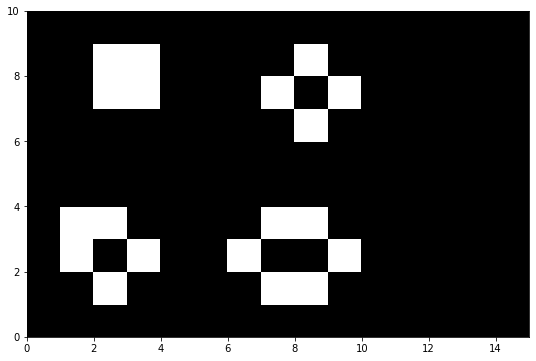

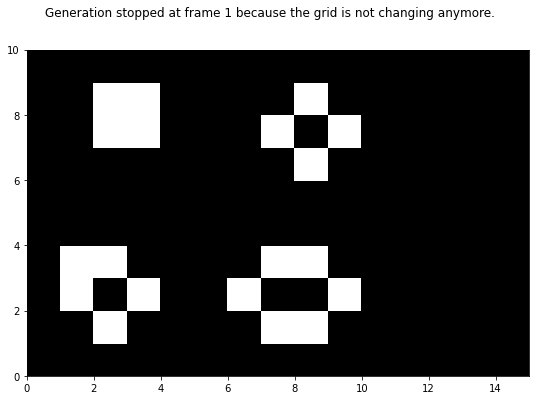

In [64]:
gridWidth = 15
gridHeight = 10
framesToRun = 100
frameTime = 1
path = 'samples/still-lives'
validatePath(path)
mainGrid = createGridFromFile(path + '/still-lives.txt', gridHeight, gridWidth)
drawGrid(mainGrid)
runGameOfLife(mainGrid, path, framesToRun, frameTime)

# Results
<img src='samples/still-lives/finalAnimation.gif' width="750" align="center" >

C:\Users\rezae\AppData\Local\Temp\ipykernel_5372\1506252941.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return grid.astype(np.bool)


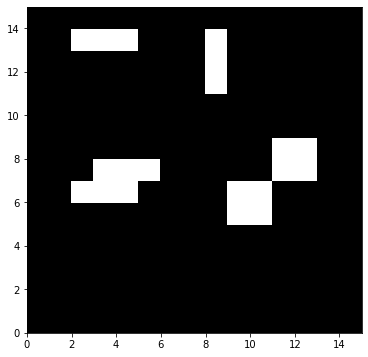

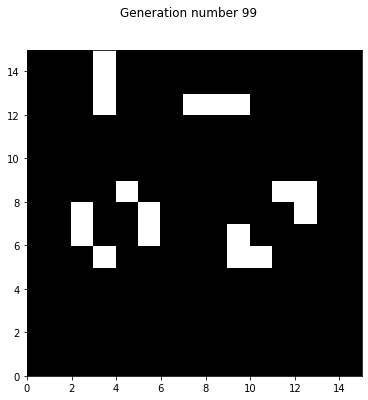

In [67]:
gridWidth = 15
gridHeight = 15
framesToRun = 100
frameTime = 1
path = 'samples/oscillators'
validatePath(path)
mainGrid = createGridFromFile(path + '/oscillators.txt', gridHeight, gridWidth)
drawGrid(mainGrid)
runGameOfLife(mainGrid, path, framesToRun, frameTime)

# Results
<img src='samples/oscillators/finalAnimation.gif' width="750" align="center" >

C:\Users\rezae\AppData\Local\Temp\ipykernel_5372\1506252941.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return grid.astype(np.bool)


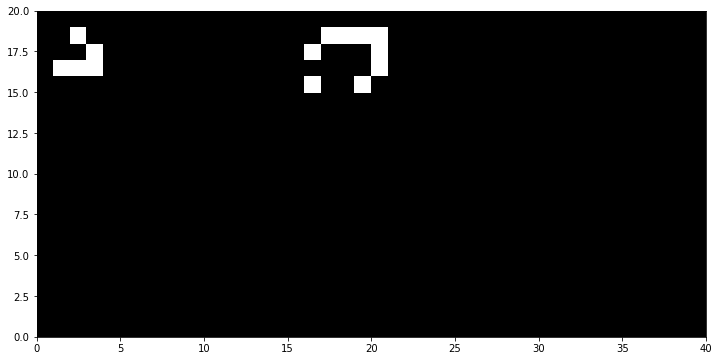

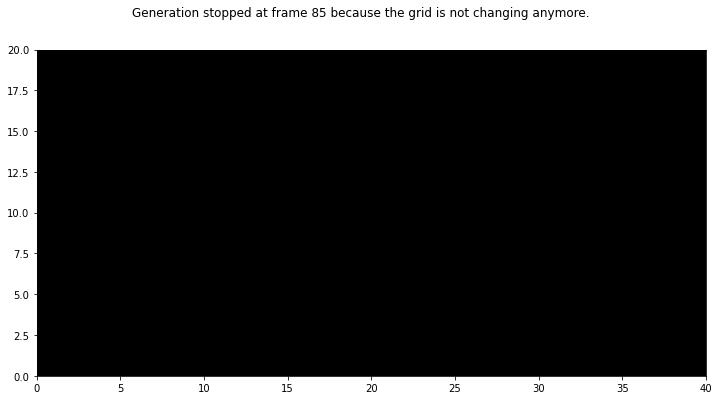

In [69]:
gridWidth = 40
gridHeight = 20
framesToRun = 100
frameTime = 1
path = 'samples/spaceships'
validatePath(path)
mainGrid = createGridFromFile(path + '/glider.txt', gridHeight, gridWidth)
drawGrid(mainGrid)
runGameOfLife(mainGrid, path, framesToRun, frameTime)

# Results
<img src='samples/spaceships/finalAnimation.gif' width="750" align="center" >